In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

- data from https://www.mediastat.or.kr/kor/contents/ContentsList.html

In [3]:
# 2020
spss_2020_df, meta_2020 = pyreadstat.read_sav('../data/2020방송매체이용행태조사_가구_공표용.SAV')
spss2_2020_df, meta2_2020 = pyreadstat.read_sav('../data/2020방송매체이용행태조사_개인_공표용.SAV')
spss3_2020_df, meta3_2020 = pyreadstat.read_sav('../data/2020방송매체이용행태조사_자녀_공표용.SAV')

# 2019
spss2_2019_df , meta2_2019 = pyreadstat. read_sav('../data/2019방송매체이용행태조사_개인.sav')

In [4]:
raw_home_2020_df = pd.read_spss('../data/2020방송매체이용행태조사_가구_공표용.SAV')

In [5]:
# 2020 이친구 column 개수가 3200개라서 로딩에 시간이 좀 걸립니다 ㅎㅎ
raw_personal_2020_df = pd.read_spss('../data/2020방송매체이용행태조사_개인_공표용.SAV')
raw_personal_2019_df = pd.read_spss('../data/2019방송매체이용행태조사_개인.sav')

In [6]:
raw_children_2020_df = pd.read_spss('../data/2020방송매체이용행태조사_자녀_공표용.SAV')

In [7]:
# column 이름으로 인덱스 찾기 : df.columns.get_loc("pear")
raw_children_2020_df.columns.get_loc("DM1")

2

In [8]:
raw_personal_2020_df['PID'] = raw_personal_2020_df['PID'].astype(int)

In [9]:
raw_personal_2020_df.head()

,PID,K_PID,WGT1,Q603,Q604,Q605,Q605R,Q606,Q610,Q621,...,BQ481A72_3,BQ481A72_4,BQ481A72_5,BQ481A72_6,BQ481A72_7,BQ481A72_8,BQ481A72_9,BQ481A72_10,BQ481A72_11,BQ481A72_12
0,101,1.0,0.417563,배우자,여,1943.0,76.0,기혼,군부,1세대가구(부부),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201,2.0,0.732607,가구주,남,1960.0,59.0,기혼,군부,독신가구,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301,3.0,0.252675,가구주,남,1939.0,80.0,기혼,군부,1세대가구(부부),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302,3.0,0.208781,배우자,여,1947.0,72.0,기혼,군부,1세대가구(부부),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,401,4.0,0.500527,가구주,여,1960.0,59.0,기혼,군부,독신가구,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
raw_personal_2020_df.shape

(6029, 3199)

for 2020

온라인동영상제공서비스 : OTT
- 381? 부터 OTT
- p_r001_m01 : 평소에 이용한 온라인동영상제공서비스(OTT)
- BQ481A56_11 등 : 언제 보통 시청하는지 데이터 같은데 전부 NA 값임
- Q520M_1 ~ 16 : 이용한 온라인 동영상 제공 서비스    /  155 ~ 170
- Q523 : 문15.온라인 동영상제공서비스 이용빈도
- Q521 등 : 키워드 '온라인동영상제공서비스'

In [11]:
print(meta_2020.column_names_to_labels)

In [12]:
print(meta2_2020.column_names_to_labels)

{'PID': 'Panel ID', 'K_PID': '가구아이디', 'WGT1': '가중치', 'Q603': '가구주와의 관계', 'Q604': '성별', 'Q605': '생년(양력)', 'Q605R': '연령', 'Q606': '혼인상태', 'Q610': '시부/군부', 'Q621': '가족구성', 'Q623': '가구원 수', 'TQ': 'Temporary', 'TV': 'TV 소유', 'RD': '라디오 소유', 'CT': '컴퓨터/테블릿PC 소유', 'Q42A': '차량용 DMB 단말기 소유', 'Q43A': 'VCR/DVD플레이어/블루레이 플레이어 소유', 'Q46A': '디지털 카메라/캠코더 소유', 'Q48A': '가구 보유형 게임기 소유', 'Q49A': '스마트형 TV 수신 장치 소유', 'Q50A': '가정용 전화 회선 사용', 'TV_1': '지상파만 이용-리코딩', 'TV_2': '케이블 방송 이용-리코딩', 'TV_3': '위성방송 이용-리코딩', 'TV_4': 'IPTV 이용-리코딩', 'TV_5': '아날로그 케이블 이용-리코딩', 'TV_6': '디지털 케이블 이용-리코딩', 'dm1': '성별', 'dm2': '연령', 'dm3': '지역', 'dm4': '직업', 'dm5': '가구소득', 'dm6': '학력', 'dm7': '주거형태', 'dm8': '가족구성', 'dm9_1': '지상파만 이용', 'dm9_2': '케이블 방송 이용', 'dm9_3': '위성방송 이용', 'dm9_4': 'IPTV 이용', 'dm10_1': '아날로그 케이블이용', 'dm10_2': '디지털 케이블이용', 'dm11': '도시규모', 'Q218': '1-1 일반폰(대).소유 대수', 'Q220': '1-2 스마트폰(대).소유 대수', 'Q222': '1-1 총(대).휴대폰 총 소유 대수', 'Q223': '1-1 휴대폰 소유', 'Q224': '1-3 MP3(대).플레이어 소유 대수', 'Q225': '1-3 라디오(대).라디오수신가능 MP3

In [13]:
print(meta3_2020.column_names_to_labels)

{'PID': 'Panel ID', 'k_pid': '가구아이디', 'DM1': '가구주 성별', 'DM2': '가구주 연령', 'Q21B': '가구주 연령-1', 'DM3': '지역', 'DM4': '가구주 직업', 'DM5': '가구소득', 'DM6': '주거형태', 'DM7': '가구유형', 'DM8': '가구주 학력', 'DM9_1': '지상파만 이용', 'DM9_2': '케이블 방송 이용', 'DM9_3': '위성방송 이용', 'DM9_4': 'IPTV 이용', 'DM10_1': '아날로그 케이블이용', 'DM10_2': '디지털 케이블이용', 'city': '도시규모', 'Q95A1': '문18(세).자녀연령', 'Q95A1R2': '문18(세).자녀연령 (Recoded)', 'Q93': '문17.만13세 미만 자녀수', 'Q96A1': '문18-1.TV수상기 시청시작 시기', 'Q117A1': '문18-2.PC,노트북/넷북 시청시작 시기', 'Q118A1': '문18-3.스마트폰 시청시작 시기', 'Q119A1': '문18-4.스마트패드(태블릿PC) 시청시작 시기', 'Q98A1': '문19.TV 수상기와 스마트폰 시청비중', 'Q99A1': '문19-1.콘텐츠 이용 비중', 'Q100A1': '문20.스마트폰 시청 지도'}


In [14]:
print('home: ',raw_home_2020_df.shape)
print('personal: ',raw_personal_2020_df.shape)
print('children: ',raw_children_2020_df.shape)

home:  (4042, 222)
personal:  (6029, 3199)
children:  (850, 28)


In [15]:
raw_personal_2020_df['dm6'].unique()

['고졸이하', '대졸이상', '대학생/대학원생', '중/고등학생']
Categories (4, object): ['고졸이하', '대졸이상', '대학생/대학원생', '중/고등학생']

#  PlayGround

In [16]:
print('@사용하는 OTT 서비스 columns\' indice@')
print('start: ', raw_personal_2020_df.columns.get_loc('Q520M_1'))
print('end: ', raw_personal_2020_df.columns.get_loc('Q520M_16'))

@사용하는 OTT 서비스 columns' indice@
start:  155
end:  170


In [17]:
print(raw_personal_2019_df['dm4'].unique())  # 직업
print(raw_personal_2019_df[['dm4']].isna().sum())
raw_personal_2019_df[['dm4']]

['학생', '서비스/판매직', '주부', '사무직', '무직', '생산직', '기타']
Categories (7, object): ['기타', '무직', '사무직', '생산직', '서비스/판매직', '주부', '학생']
dm4    0
dtype: int64


,dm4
0,학생
1,학생
2,서비스/판매직
3,주부
4,서비스/판매직
...,...
6370,학생
6371,주부
6372,학생
6373,서비스/판매직


In [18]:
which_ott_df = raw_personal_2020_df.iloc[:, 155:171]
# which_ott_df.head(3)
which_ott_df.insert(0, raw_personal_2020_df.columns[0], raw_personal_2020_df['PID'])
which_ott_df.head(3)

,PID,Q520M_1,Q520M_2,Q520M_3,Q520M_4,Q520M_5,Q520M_6,Q520M_7,Q520M_8,Q520M_9,Q520M_10,Q520M_11,Q520M_12,Q520M_13,Q520M_14,Q520M_15,Q520M_16
0,101,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
which_ott_df.isna().sum()

PID            0
Q520M_1        0
Q520M_2     5111
Q520M_3     5717
Q520M_4     5914
Q520M_5     5986
Q520M_6     6010
Q520M_7     6019
Q520M_8     6028
Q520M_9     6028
Q520M_10    6028
Q520M_11    6028
Q520M_12    6029
Q520M_13    6029
Q520M_14    6029
Q520M_15    6029
Q520M_16    6029
dtype: int64

In [20]:
which_ott_df[~which_ott_df['Q520M_11'].isna()]

,PID,Q520M_1,Q520M_2,Q520M_3,Q520M_4,Q520M_5,Q520M_6,Q520M_7,Q520M_8,Q520M_9,Q520M_10,Q520M_11,Q520M_12,Q520M_13,Q520M_14,Q520M_15,Q520M_16
4370,289801,Wavve,Tving,U+모바일 TV,네이버 TV,V live,아프리카 TV,왓챠플레이,카카오 TV,페이스북,유튜브,넷플릭스,NaN,NaN,NaN,NaN,NaN


# OTT 관련 데이터프레임

In [21]:
p_labels = meta2_2020.column_names_to_labels

In [22]:
type(p_labels)

dict

In [23]:
p_labels

{'PID': 'Panel ID',
 'K_PID': '가구아이디',
 'WGT1': '가중치',
 'Q603': '가구주와의 관계',
 'Q604': '성별',
 'Q605': '생년(양력)',
 'Q605R': '연령',
 'Q606': '혼인상태',
 'Q610': '시부/군부',
 'Q621': '가족구성',
 'Q623': '가구원 수',
 'TQ': 'Temporary',
 'TV': 'TV 소유',
 'RD': '라디오 소유',
 'CT': '컴퓨터/테블릿PC 소유',
 'Q42A': '차량용 DMB 단말기 소유',
 'Q43A': 'VCR/DVD플레이어/블루레이 플레이어 소유',
 'Q46A': '디지털 카메라/캠코더 소유',
 'Q48A': '가구 보유형 게임기 소유',
 'Q49A': '스마트형 TV 수신 장치 소유',
 'Q50A': '가정용 전화 회선 사용',
 'TV_1': '지상파만 이용-리코딩',
 'TV_2': '케이블 방송 이용-리코딩',
 'TV_3': '위성방송 이용-리코딩',
 'TV_4': 'IPTV 이용-리코딩',
 'TV_5': '아날로그 케이블 이용-리코딩',
 'TV_6': '디지털 케이블 이용-리코딩',
 'dm1': '성별',
 'dm2': '연령',
 'dm3': '지역',
 'dm4': '직업',
 'dm5': '가구소득',
 'dm6': '학력',
 'dm7': '주거형태',
 'dm8': '가족구성',
 'dm9_1': '지상파만 이용',
 'dm9_2': '케이블 방송 이용',
 'dm9_3': '위성방송 이용',
 'dm9_4': 'IPTV 이용',
 'dm10_1': '아날로그 케이블이용',
 'dm10_2': '디지털 케이블이용',
 'dm11': '도시규모',
 'Q218': '1-1 일반폰(대).소유 대수',
 'Q220': '1-2 스마트폰(대).소유 대수',
 'Q222': '1-1 총(대).휴대폰 총 소유 대수',
 'Q223': '1-1 휴대폰 소유',
 'Q224': '1-3 MP3(대

- '온라인' 이라는 단어가 들어간 value 를 가진 key의 리스트

In [24]:
list_contains_online = []
for k in p_labels:
    if '온라인' in p_labels[k]:
        list_contains_online.append(k)
    print(k)


PID
K_PID
WGT1
Q603
Q604
Q605
Q605R
Q606
Q610
Q621
Q623
TQ
TV
RD
CT
Q42A
Q43A
Q46A
Q48A
Q49A
Q50A
TV_1
TV_2
TV_3
TV_4
TV_5
TV_6
dm1
dm2
dm3
dm4
dm5
dm6
dm7
dm8
dm9_1
dm9_2
dm9_3
dm9_4
dm10_1
dm10_2
dm11
Q218
Q220
Q222
Q223
Q224
Q225
Q226
Q230
Q232
Q233
Q234
Q235
Q217
Q540
Q541
Q237A1
Q237A2
Q237A3
Q237A4
Q237A5
Q237A6
Q237A7
Q237A8
Q237A9
Q238
Q239
Q240
Q240A
Q241
Q242
Q243
Q243A
Q244
Q245
Q246
Q246A
Q247
Q248
Q249
Q249A
Q251M_1
Q251M_2
Q251M_3
Q251M_4
Q251M_5
Q252
Q253M_1
Q253M_2
Q253M_3
Q253M_4
Q253M_5
Q253M_6
Q253M_7
Q253M_8
Q260
Q265
Q266
Q267
Q268
Q269
Q254M_1
Q254M_2
Q254M_3
Q254M_4
Q254M_5
Q254M_6
Q254M_7
Q254M_8
Q254M_9
Q256M_1
Q256M_2
Q256M_3
Q256M_4
Q256M_5
Q256M_6
Q256M_7
Q256M_8
Q256M_9
Q256M_10
Q256M_11
Q256M_12
Q352M_1
Q352M_2
Q352M_3
Q352M_4
Q352M_5
Q352M_6
Q352M_7
Q352M_8
Q352M_9
Q352M_10
Q352M_11
Q352M_12
Q353M_1
Q353M_2
Q353M_3
Q353M_4
Q353M_5
Q353M_6
Q354
Q547
Q371
Q372
Q373
Q374
Q374A
Q375
Q376
Q377
Q377A
Q378
Q379
Q380
Q520M_1
Q520M_2
Q520M_3
Q520M_4
Q520M_5
Q520M_

In [25]:
# list_contains_online = [k for k in p_labels if '온라인' in p_labels[k]]
# list_contains_online

In [26]:
len(list_contains_online)

64

- '온라인'이라는 단어가 들어간 value를 가진 딕셔너리

In [27]:
dict_contains_online = dict()
for k in p_labels:
    if '온라인' in p_labels[k]:
        dict_contains_online[k] = p_labels[k]

In [28]:
dict_contains_online

{'Q520M_1': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_2': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_3': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_4': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_5': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_6': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_7': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_8': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_9': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_10': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_11': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_12': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_13': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_14': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_15': '문13.이용한 온라인 동영상 제공 서비스',
 'Q520M_16': '문13.이용한 온라인 동영상 제공 서비스',
 'Q521': '문13 기타.이용한 온라인동영상제공서비스',
 'Q551M_1': '문14.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_2': '문14.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_3': '문14.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_4': '문14.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_5': '문14.온라인동영상제공서비스 유료서비스 이용',
 'Q523': '문15.온라인 동영상제공서비스 이용빈도',
 'Q522M_1': '문16.온라인동영상제공서비스 이용 기기',
 'Q522M_2': '문16.온라인동영상제공서비스 이용 기기',
 'Q522M_3': '문16.온라인동영상제공서비스 이용 기기',
 'Q52

In [29]:
raw_personal_2020_ott_df = pd.DataFrame(raw_personal_2020_df[list_contains_online])
raw_personal_2020_ott_df.insert(0, raw_personal_2020_df.columns[0], raw_personal_2020_df['PID'])

In [30]:
raw_personal_2020_ott_df.head()

,PID,Q520M_1,Q520M_2,Q520M_3,Q520M_4,Q520M_5,Q520M_6,Q520M_7,Q520M_8,Q520M_9,...,Q529M_8,Q529M_9,Q529M_10,Q529M_11,Q529M_12,Q529M_13,Q529M_14,Q529M_15,Q529M_16,Q529M_17
0,101,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302,이용한적 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,401,유튜브,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  OTT 시청시간대

In [31]:
# 온라인동영상제공서비스 주 이용시간대
print(raw_personal_2020_ott_df.columns.get_loc("Q552"))
print(raw_personal_2020_ott_df.columns.get_loc("Q555"))

29
32


In [32]:
time_use_ott_df = pd.concat([raw_personal_2020_ott_df['PID'], raw_personal_2020_ott_df.iloc[:,29:31]], axis=1)

In [33]:
time_use_ott_df = time_use_ott_df.rename(columns={'Q552':'ott 주중 이용시간대', 'Q553':'ott 주말 이용시간대'})

In [34]:
# 이용 시간대 Nan값
time_use_ott_df.isna().sum()

PID                0
ott 주중 이용시간대    3034
ott 주말 이용시간대    3034
dtype: int64

In [35]:
time_use_ott_nn_df = time_use_ott_df[(time_use_ott_df['ott 주중 이용시간대'].notna() == True) | (time_use_ott_df['ott 주말 이용시간대'].notna() == True)]
print(time_use_ott_nn_df['ott 주중 이용시간대'].count()) # result didn't change if put & instead of |
time_use_ott_nn_df

2995


,PID,ott 주중 이용시간대,ott 주말 이용시간대
4,401,12:00~14:59,15:00~17:59
22,1701,18:00~20:59,12:00~14:59
26,2001,18:00~20:59,12:00~14:59
27,2002,12:00~14:59,이용하지 않음
28,2101,12:00~14:59,9:00~11:59
...,...,...,...
6020,404901,12:00~14:59,이용하지 않음
6021,404902,이용하지 않음,18:00~20:59
6022,405001,9:00~11:59,12:00~14:59
6024,407301,15:00~17:59,15:00~17:59


## seaborn test 
- PID 기준으로 성별, 연령 inner join

In [36]:
sns_test_df = pd.concat([raw_personal_2020_df[['PID','Q604', 'Q605R', 'dm4']], time_use_ott_nn_df], axis=1, join='inner')

- 중복된 PID 삭제

In [37]:
sns_test_df = sns_test_df.T.drop_duplicates().T

In [38]:
sns_test_df = sns_test_df.rename(columns={'Q604': '성별', 'Q605R': '연령', 'dm4':'직업'})

In [39]:
sns_test_df['연령'] = sns_test_df['연령'].astype(int)

In [40]:
sns_test_df.head()

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
4,401,여,59,서비스/판매직,12:00~14:59,15:00~17:59
22,1701,남,54,생산직,18:00~20:59,12:00~14:59
26,2001,남,34,사무직,18:00~20:59,12:00~14:59
27,2002,여,34,주부,12:00~14:59,이용하지 않음
28,2101,남,49,생산직,12:00~14:59,9:00~11:59


In [41]:
logistic_test_df = sns_test_df.copy()

In [42]:
# logistic_test_df.to_csv('../data/ott_2019_2020_for_ML.csv', sep=',', encoding='utf-8-sig')

- 연령 categorizing

In [43]:
bins = [10, 20, 30, 40, 50, 60, 120]
labels = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
sns_test_df['연령'] = pd.cut(sns_test_df['연령'], bins=bins, labels=labels, right=False)

In [44]:
sns_test_df.head()

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
4,401,여,50대,서비스/판매직,12:00~14:59,15:00~17:59
22,1701,남,50대,생산직,18:00~20:59,12:00~14:59
26,2001,남,30대,사무직,18:00~20:59,12:00~14:59
27,2002,여,30대,주부,12:00~14:59,이용하지 않음
28,2101,남,40대,생산직,12:00~14:59,9:00~11:59


#### Seaborn Test 시작

In [45]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

In [46]:
sorted(set(sns_test_df['ott 주중 이용시간대'].values))

['12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '6:00~8:59',
 '9:00~11:59',
 '이용하지 않음']

In [47]:
order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

Text(0.5, 1.0, '남녀별 ott 주중 이용시간대 2020')

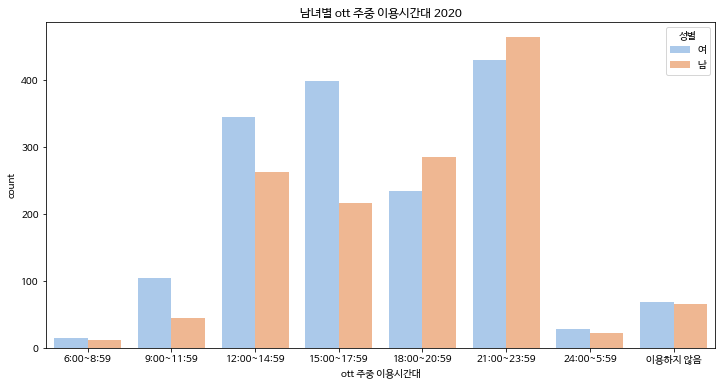

In [48]:
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.countplot(x='ott 주중 이용시간대', hue='성별', order=order, data=sns_test_df)
plt.title('남녀별 ott 주중 이용시간대 2020')

Text(0.5, 1.0, '남녀별 ott 주말 이용시간대 2020')

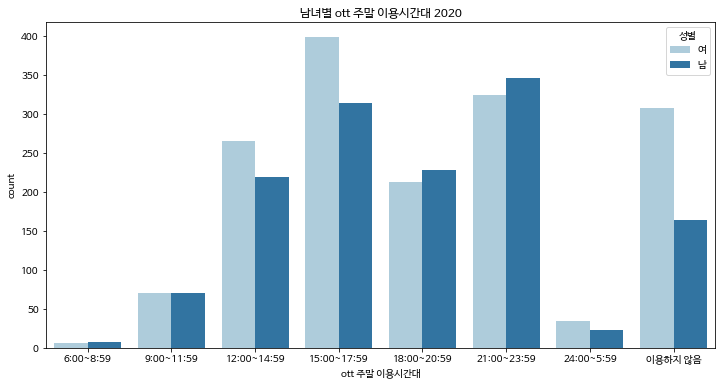

In [49]:
plt.figure(figsize=(12,6))
sns.set_palette('Paired')
sns.countplot(x='ott 주말 이용시간대', hue='성별', order=order, data=sns_test_df)
plt.title('남녀별 ott 주말 이용시간대 2020')


###  OTT 시청 시간대 OHE

In [50]:
ohe_time_use_ott_nn_df = pd.get_dummies(data=time_use_ott_nn_df, columns=['ott 주중 이용시간대', 'ott 주말 이용시간대'])

In [51]:
ohe_time_use_ott_nn_df

,PID,ott 주중 이용시간대_12:00~14:59,ott 주중 이용시간대_15:00~17:59,ott 주중 이용시간대_18:00~20:59,ott 주중 이용시간대_21:00~23:59,ott 주중 이용시간대_24:00~5:59,ott 주중 이용시간대_6:00~8:59,ott 주중 이용시간대_9:00~11:59,ott 주중 이용시간대_이용하지 않음,ott 주말 이용시간대_12:00~14:59,ott 주말 이용시간대_15:00~17:59,ott 주말 이용시간대_18:00~20:59,ott 주말 이용시간대_21:00~23:59,ott 주말 이용시간대_24:00~5:59,ott 주말 이용시간대_6:00~8:59,ott 주말 이용시간대_9:00~11:59,ott 주말 이용시간대_이용하지 않음
4,401,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22,1701,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
26,2001,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27,2002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28,2101,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,404901,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6021,404902,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6022,405001,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
6024,407301,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


'Q604': '성별', 'Q605': '생년(양력)', 'Q605R': '연령'

###  PID를 기준으로 성별, 연령 inner join

In [52]:
# time and personal indormation
time_and_pi_df = pd.concat([raw_personal_2020_df[['PID','Q604', 'Q605R']], ohe_time_use_ott_nn_df], axis=1, join='inner')

######  중복된 PID 삭제

In [53]:
time_and_pi_df = time_and_pi_df.T.drop_duplicates().T

In [54]:
time_and_pi_df = time_and_pi_df.rename(columns={'Q604': '성별', 'Q605R': '연령'})

In [55]:
time_and_pi_df['연령'] = time_and_pi_df['연령'].astype(int)

In [56]:
time_and_pi_df.head()

,PID,성별,연령,ott 주중 이용시간대_12:00~14:59,ott 주중 이용시간대_15:00~17:59,ott 주중 이용시간대_18:00~20:59,ott 주중 이용시간대_21:00~23:59,ott 주중 이용시간대_24:00~5:59,ott 주중 이용시간대_6:00~8:59,ott 주중 이용시간대_9:00~11:59,ott 주중 이용시간대_이용하지 않음,ott 주말 이용시간대_12:00~14:59,ott 주말 이용시간대_15:00~17:59,ott 주말 이용시간대_18:00~20:59,ott 주말 이용시간대_21:00~23:59,ott 주말 이용시간대_24:00~5:59,ott 주말 이용시간대_6:00~8:59,ott 주말 이용시간대_9:00~11:59,ott 주말 이용시간대_이용하지 않음
4,401,여,59,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22,1701,남,54,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
26,2001,남,34,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27,2002,여,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28,2101,남,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
time_and_pi_df.groupby('성별').get_group('남').iloc[:, 3:].sum()

ott 주중 이용시간대_12:00~14:59    263
ott 주중 이용시간대_15:00~17:59    217
ott 주중 이용시간대_18:00~20:59    285
ott 주중 이용시간대_21:00~23:59    464
ott 주중 이용시간대_24:00~5:59      22
ott 주중 이용시간대_6:00~8:59       12
ott 주중 이용시간대_9:00~11:59      44
ott 주중 이용시간대_이용하지 않음         66
ott 주말 이용시간대_12:00~14:59    219
ott 주말 이용시간대_15:00~17:59    314
ott 주말 이용시간대_18:00~20:59    229
ott 주말 이용시간대_21:00~23:59    346
ott 주말 이용시간대_24:00~5:59      23
ott 주말 이용시간대_6:00~8:59        7
ott 주말 이용시간대_9:00~11:59      71
ott 주말 이용시간대_이용하지 않음        164
dtype: object

## 나이 categorizing 

In [58]:
print(time_and_pi_df.연령.min())
print(time_and_pi_df.연령.max())

12
87


In [59]:
print(time_and_pi_df[(time_and_pi_df['연령'] >= 10) & (time_and_pi_df['연령'] < 20)]['PID'].count())
print(time_and_pi_df[(time_and_pi_df['연령'] < 60) & (time_and_pi_df['연령'] >= 50)]['PID'].count())
print(time_and_pi_df[time_and_pi_df['연령'] >= 60]['PID'].count())

149
643
583


- categorizing ages

 https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

In [60]:
bins = [10, 20, 30, 40, 50, 60, 120]
labels = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
time_and_pi_df['연령'] = pd.cut(time_and_pi_df['연령'], bins=bins, labels=labels, right=False)

In [61]:
time_and_pi_df

,PID,성별,연령,ott 주중 이용시간대_12:00~14:59,ott 주중 이용시간대_15:00~17:59,ott 주중 이용시간대_18:00~20:59,ott 주중 이용시간대_21:00~23:59,ott 주중 이용시간대_24:00~5:59,ott 주중 이용시간대_6:00~8:59,ott 주중 이용시간대_9:00~11:59,ott 주중 이용시간대_이용하지 않음,ott 주말 이용시간대_12:00~14:59,ott 주말 이용시간대_15:00~17:59,ott 주말 이용시간대_18:00~20:59,ott 주말 이용시간대_21:00~23:59,ott 주말 이용시간대_24:00~5:59,ott 주말 이용시간대_6:00~8:59,ott 주말 이용시간대_9:00~11:59,ott 주말 이용시간대_이용하지 않음
4,401,여,50대,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22,1701,남,50대,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
26,2001,남,30대,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
27,2002,여,30대,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28,2101,남,40대,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,404901,여,40대,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6021,404902,여,10대,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6022,405001,여,10대,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
6024,407301,남,50대,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


- 남녀별 주중 이용시간대

In [62]:

weekdays_df = time_and_pi_df.iloc[:,1:11].groupby(['성별', '연령']).sum()
weekdays_df

ott 주중 이용시간대_12:00~14:59  ott 주중 이용시간대_15:00~17:59  \
성별 연령                                                           
남  10대                            6                        10   
   20대                           26                        16   
   30대                           34                        27   
   40대                           59                        42   
   50대                           66                        41   
   60세 이상                        72                        81   
여  10대                            6                         8   
   20대                           26                        21   
   30대                           57                        67   
   40대                           74                        90   
   50대                           94                       114   
   60세 이상                        88                        99   

           ott 주중 이용시간대_18:00~20:59  ott 주중 이용시간대_21:00~23:59  \
성별 연령                                                           
남  10대                           20                        35   
   20대                           51                       105   
   30대                           60                       103   
   40대                           60                        88   
   50대                           50                        86   
   60세 이상                        44                        47   
여  10대                           14                        32   
   20대                           34                       106   
   30대                           49                        91   
   40대                           43                       111   
   50대                           54                        61   
   60세 이상                        40                        29   

           ott 주중 이용시간대_24:00~5:59  ott 주중 이용시간대_6:00~8:59  \
성별 연령                                                        
남  10대                           1                       0   
   20대                           6                       1   
   30대                           8                       3   
   40대                           3                       2   
   50대                           3                       5   
   60세 이상                        1                       1   
여  10대                           7                       0   
   20대                           5                       1   
   30대                           4                       6   
   40대                           5                       3   
   50대                           5                       3   
   60세 이상                        2                       1   

           ott 주중 이용시간대_9:00~11:59  ott 주중 이용시간대_이용하지 않음  
성별 연령                                                     
남  10대                           0                     5  
   20대                           5                     7  
   30대                           2                     8  
   40대                           3                    16  
   50대                           6                    18  
   60세 이상                       28                    12  
여  10대                           1                     4  
   20대                           6                     6  
   30대                          24                    21  
   40대                          21                    14  
   50대                          21                    16  
   60세 이상                       31                     7

In [63]:
weekdays_df.iloc[weekdays_df.index.get_level_values('성별') == '남']

ott 주중 이용시간대_12:00~14:59  ott 주중 이용시간대_15:00~17:59  \
성별 연령                                                           
남  10대                            6                        10   
   20대                           26                        16   
   30대                           34                        27   
   40대                           59                        42   
   50대                           66                        41   
   60세 이상                        72                        81   

           ott 주중 이용시간대_18:00~20:59  ott 주중 이용시간대_21:00~23:59  \
성별 연령                                                           
남  10대                           20                        35   
   20대                           51                       105   
   30대                           60                       103   
   40대                           60                        88   
   50대                           50                        86   
   60세 이상                        44                        47   

           ott 주중 이용시간대_24:00~5:59  ott 주중 이용시간대_6:00~8:59  \
성별 연령                                                        
남  10대                           1                       0   
   20대                           6                       1   
   30대                           8                       3   
   40대                           3                       2   
   50대                           3                       5   
   60세 이상                        1                       1   

           ott 주중 이용시간대_9:00~11:59  ott 주중 이용시간대_이용하지 않음  
성별 연령                                                     
남  10대                           0                     5  
   20대                           5                     7  
   30대                           2                     8  
   40대                           3                    16  
   50대                           6                    18  
   60세 이상                       28                    12

In [64]:
weekdays_df.iloc[weekdays_df.index.get_level_values('성별') == '여']

ott 주중 이용시간대_12:00~14:59  ott 주중 이용시간대_15:00~17:59  \
성별 연령                                                           
여  10대                            6                         8   
   20대                           26                        21   
   30대                           57                        67   
   40대                           74                        90   
   50대                           94                       114   
   60세 이상                        88                        99   

           ott 주중 이용시간대_18:00~20:59  ott 주중 이용시간대_21:00~23:59  \
성별 연령                                                           
여  10대                           14                        32   
   20대                           34                       106   
   30대                           49                        91   
   40대                           43                       111   
   50대                           54                        61   
   60세 이상                        40                        29   

           ott 주중 이용시간대_24:00~5:59  ott 주중 이용시간대_6:00~8:59  \
성별 연령                                                        
여  10대                           7                       0   
   20대                           5                       1   
   30대                           4                       6   
   40대                           5                       3   
   50대                           5                       3   
   60세 이상                        2                       1   

           ott 주중 이용시간대_9:00~11:59  ott 주중 이용시간대_이용하지 않음  
성별 연령                                                     
여  10대                           1                     4  
   20대                           6                     6  
   30대                          24                    21  
   40대                          21                    14  
   50대                          21                    16  
   60세 이상                       31                     7

- 남녀별 주말 이용시간대

In [65]:
weekend_df = pd.concat([time_and_pi_df.iloc[:, 1:3], time_and_pi_df.iloc[:, 11:]], axis=1).groupby(['성별', '연령']).sum()
weekend_df

ott 주말 이용시간대_12:00~14:59  ott 주말 이용시간대_15:00~17:59  \
성별 연령                                                           
남  10대                           10                        19   
   20대                           33                        33   
   30대                           25                        52   
   40대                           45                        60   
   50대                           48                        64   
   60세 이상                        58                        86   
여  10대                            7                        14   
   20대                           32                        39   
   30대                           58                        69   
   40대                           49                        90   
   50대                           54                       101   
   60세 이상                        66                        86   

           ott 주말 이용시간대_18:00~20:59  ott 주말 이용시간대_21:00~23:59  \
성별 연령                                                           
남  10대                           13                        26   
   20대                           48                        82   
   30대                           45                        77   
   40대                           51                        58   
   50대                           41                        57   
   60세 이상                        31                        46   
여  10대                           17                        22   
   20대                           32                        72   
   30대                           52                        68   
   40대                           36                        78   
   50대                           41                        56   
   60세 이상                        35                        29   

           ott 주말 이용시간대_24:00~5:59  ott 주말 이용시간대_6:00~8:59  \
성별 연령                                                        
남  10대                           3                       0   
   20대                           5                       1   
   30대                          10                       1   
   40대                           2                       0   
   50대                           2                       5   
   60세 이상                        1                       0   
여  10대                           6                       1   
   20대                          10                       0   
   30대                           9                       1   
   40대                           3                       2   
   50대                           4                       1   
   60세 이상                        3                       1   

           ott 주말 이용시간대_9:00~11:59  ott 주말 이용시간대_이용하지 않음  
성별 연령                                                     
남  10대                           5                     1  
   20대                           7                     8  
   30대                          14                    21  
   40대                          12                    45  
   50대                           9                    49  
   60세 이상                       24                    40  
여  10대                           3                     2  
   20대                           6                    14  
   30대                          11                    51  
   40대                          14                    89  
   50대                          17                    94  
   60세 이상                       19                    58

In [66]:
weekend_df.iloc[weekend_df.index.get_level_values('성별') == '남']

ott 주말 이용시간대_12:00~14:59  ott 주말 이용시간대_15:00~17:59  \
성별 연령                                                           
남  10대                           10                        19   
   20대                           33                        33   
   30대                           25                        52   
   40대                           45                        60   
   50대                           48                        64   
   60세 이상                        58                        86   

           ott 주말 이용시간대_18:00~20:59  ott 주말 이용시간대_21:00~23:59  \
성별 연령                                                           
남  10대                           13                        26   
   20대                           48                        82   
   30대                           45                        77   
   40대                           51                        58   
   50대                           41                        57   
   60세 이상                        31                        46   

           ott 주말 이용시간대_24:00~5:59  ott 주말 이용시간대_6:00~8:59  \
성별 연령                                                        
남  10대                           3                       0   
   20대                           5                       1   
   30대                          10                       1   
   40대                           2                       0   
   50대                           2                       5   
   60세 이상                        1                       0   

           ott 주말 이용시간대_9:00~11:59  ott 주말 이용시간대_이용하지 않음  
성별 연령                                                     
남  10대                           5                     1  
   20대                           7                     8  
   30대                          14                    21  
   40대                          12                    45  
   50대                           9                    49  
   60세 이상                       24                    40

In [67]:
weekend_df.iloc[weekend_df.index.get_level_values('성별') == '여']

ott 주말 이용시간대_12:00~14:59  ott 주말 이용시간대_15:00~17:59  \
성별 연령                                                           
여  10대                            7                        14   
   20대                           32                        39   
   30대                           58                        69   
   40대                           49                        90   
   50대                           54                       101   
   60세 이상                        66                        86   

           ott 주말 이용시간대_18:00~20:59  ott 주말 이용시간대_21:00~23:59  \
성별 연령                                                           
여  10대                           17                        22   
   20대                           32                        72   
   30대                           52                        68   
   40대                           36                        78   
   50대                           41                        56   
   60세 이상                        35                        29   

           ott 주말 이용시간대_24:00~5:59  ott 주말 이용시간대_6:00~8:59  \
성별 연령                                                        
여  10대                           6                       1   
   20대                          10                       0   
   30대                           9                       1   
   40대                           3                       2   
   50대                           4                       1   
   60세 이상                        3                       1   

           ott 주말 이용시간대_9:00~11:59  ott 주말 이용시간대_이용하지 않음  
성별 연령                                                     
여  10대                           3                     2  
   20대                           6                    14  
   30대                          11                    51  
   40대                          14                    89  
   50대                          17                    94  
   60세 이상                       19                    58

###  그래프

In [68]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [69]:
plt.rc('font', family='NanumBarunGothic')

<AxesSubplot:xlabel='성별,연령'>

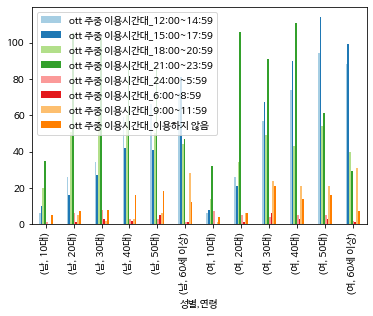

In [70]:
weekdays_df.plot(kind='bar')

<AxesSubplot:xlabel='성별,연령'>

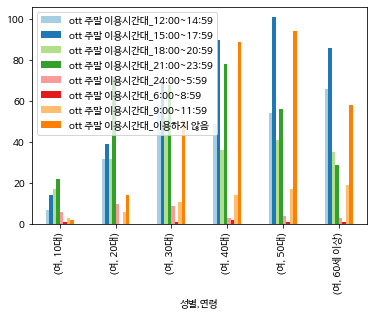

In [71]:
weekend_df.iloc[weekend_df.index.get_level_values('성별') == '여'].plot(kind='bar')


<AxesSubplot:>

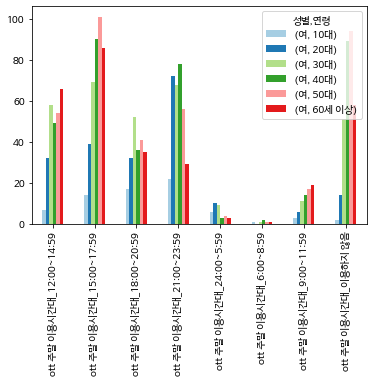

In [72]:
weekend_df.iloc[weekend_df.index.get_level_values('성별') == '여'].T.plot(kind='bar')


# More Plottings 

In [73]:
sns_test_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
4,401,여,50대,서비스/판매직,12:00~14:59,15:00~17:59
22,1701,남,50대,생산직,18:00~20:59,12:00~14:59
26,2001,남,30대,사무직,18:00~20:59,12:00~14:59
27,2002,여,30대,주부,12:00~14:59,이용하지 않음
28,2101,남,40대,생산직,12:00~14:59,9:00~11:59
...,...,...,...,...,...,...
6020,404901,여,40대,사무직,12:00~14:59,이용하지 않음
6021,404902,여,10대,학생,이용하지 않음,18:00~20:59
6022,405001,여,10대,서비스/판매직,9:00~11:59,12:00~14:59
6024,407301,남,50대,생산직,15:00~17:59,15:00~17:59


In [74]:
sns_test_df = sns_test_df.sort_values(by='성별')
sns_test_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
2095,138402,남,60세 이상,사무직,18:00~20:59,12:00~14:59
2108,139404,남,20대,무직,18:00~20:59,18:00~20:59
4409,292503,남,10대,학생,12:00~14:59,9:00~11:59
2106,139402,남,60세 이상,서비스/판매직,18:00~20:59,18:00~20:59
3535,232901,남,30대,무직,21:00~23:59,21:00~23:59
...,...,...,...,...,...,...
2733,183002,여,40대,사무직,18:00~20:59,이용하지 않음
2730,182801,여,40대,서비스/판매직,21:00~23:59,이용하지 않음
2729,182701,여,40대,서비스/판매직,18:00~20:59,이용하지 않음
2723,182202,여,30대,서비스/판매직,21:00~23:59,21:00~23:59


In [75]:
order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

Text(0.5, 1.0, '연령별 ott 주중 이용시간대')

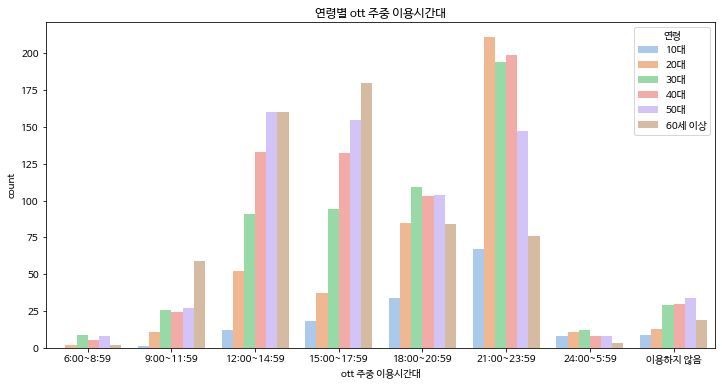

In [76]:
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.countplot(x='ott 주중 이용시간대', hue='연령', order=order, data=sns_test_df)
plt.title('연령별 ott 주중 이용시간대')

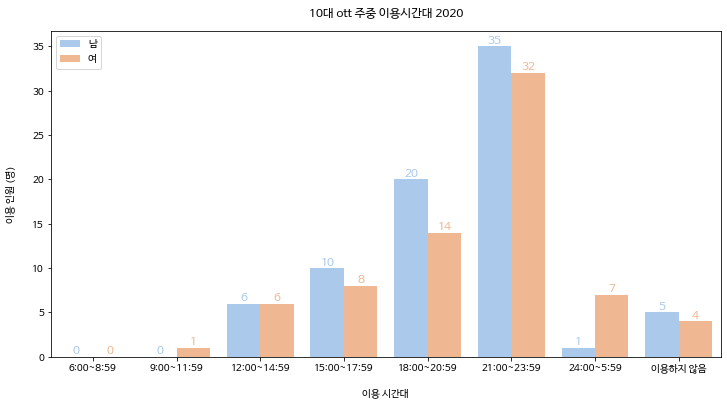

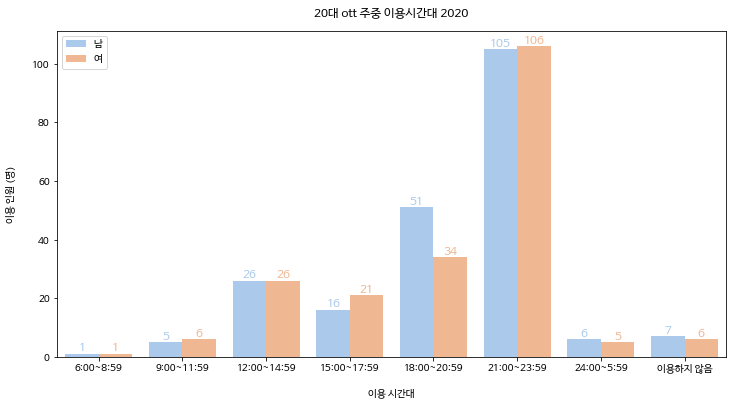

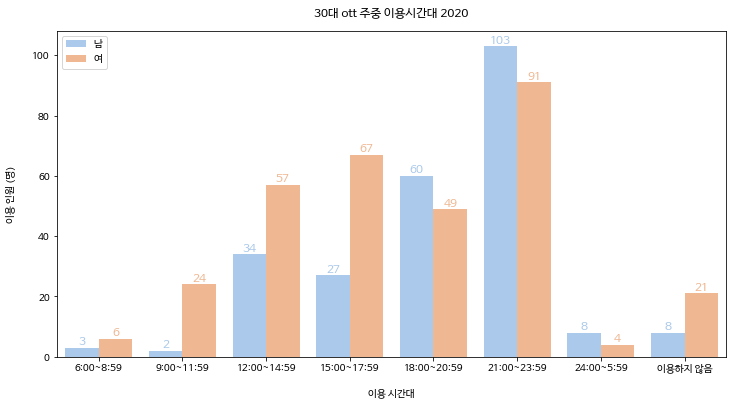

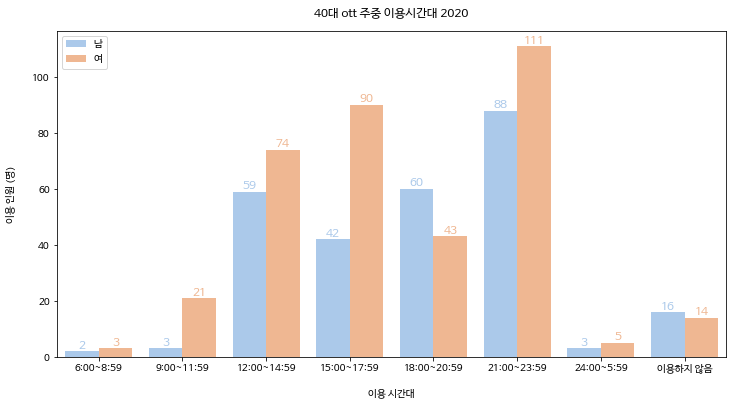

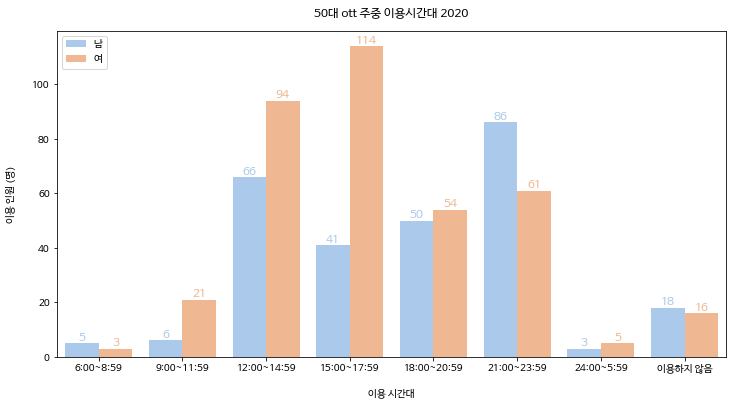

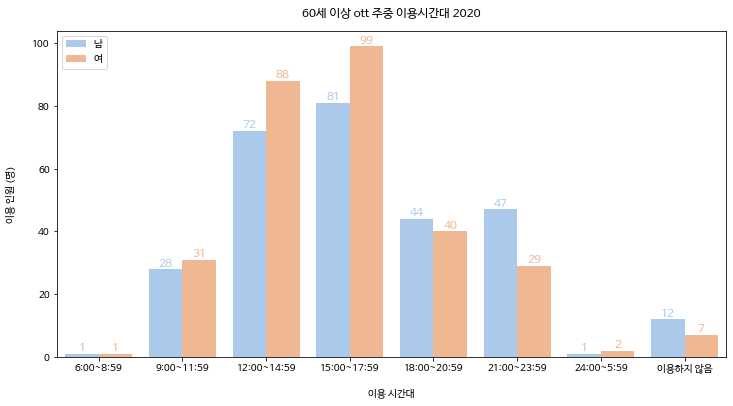

In [77]:
target_age_list = ['10대', '20대', '30대', '40대', '50대', '60세 이상']

for target_age in target_age_list:
    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_palette('pastel')
    sns.countplot(x='ott 주중 이용시간대', hue='성별', order=order, data=sns_test_df[sns_test_df['연령'] == target_age])
    # plt.title('10대 ott 주중 이용시간대')
    ax.set_xlabel('이용 시간대', labelpad=15)
    ax.set_ylabel('이용 인원 (명)', labelpad=15)
    ax.set_title(f'{target_age} ott 주중 이용시간대 2020', pad=15)

    # legend
    ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{int(bar_value):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0
            
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        
#         text_y = bar.get_y() + bar_value
        
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

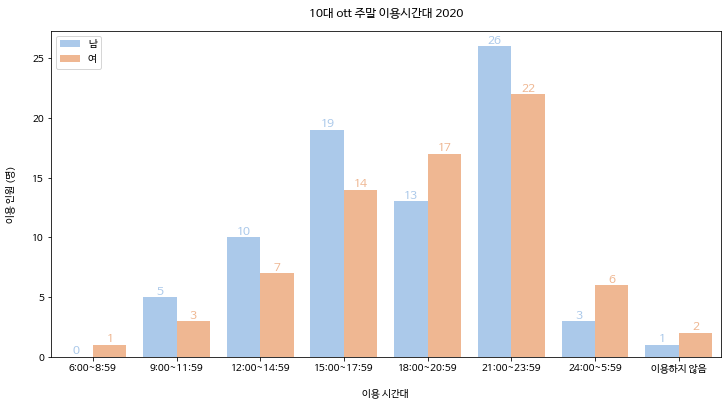

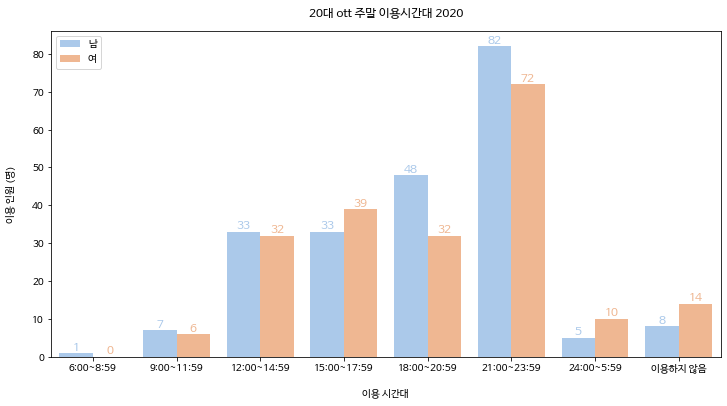

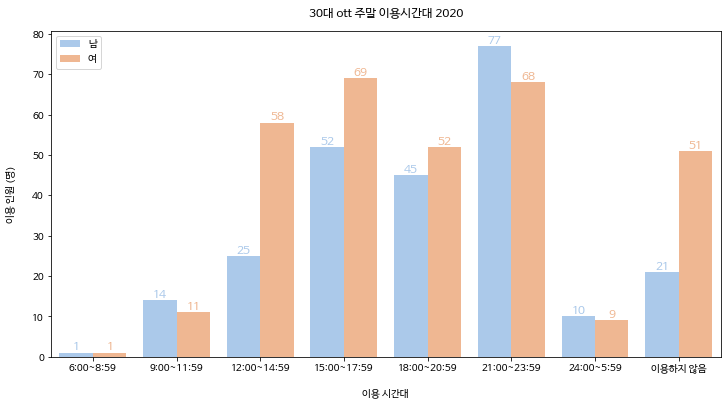

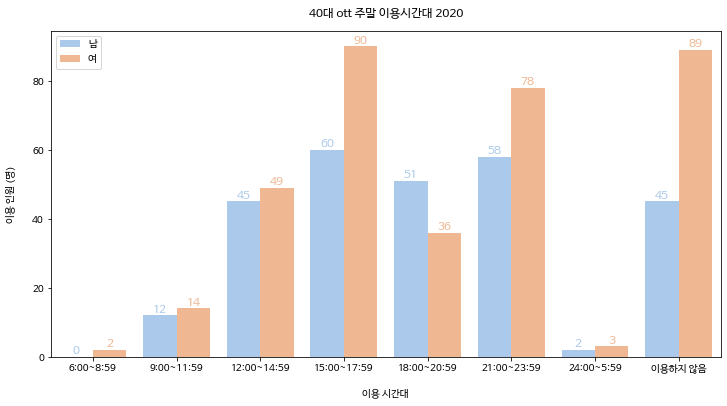

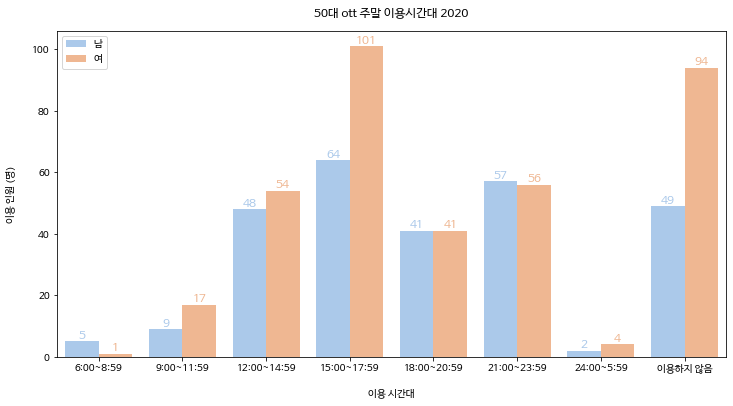

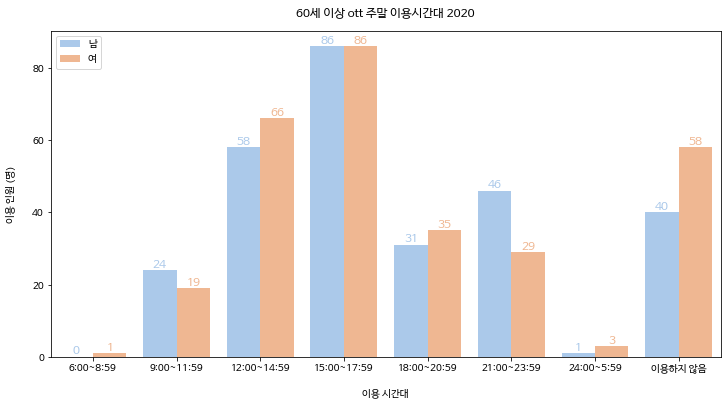

In [78]:
target_age_list = ['10대', '20대', '30대', '40대', '50대', '60세 이상']

for target_age in target_age_list:

    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_palette('pastel')
    sns.countplot(x='ott 주말 이용시간대', hue='성별', order=order, data=sns_test_df[sns_test_df['연령'] == target_age])
    # plt.title('10대 ott 주중 이용시간대')
    ax.set_xlabel('이용 시간대', labelpad=15)
    ax.set_ylabel('이용 인원 (명)', labelpad=15)
    ax.set_title(f'{target_age} ott 주말 이용시간대 2020', pad=15)

    # legend
    ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{int(bar_value):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0
            
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        
        # text_y = bar.get_y() + bar_value
        
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

- 만약 하나씩 할 때

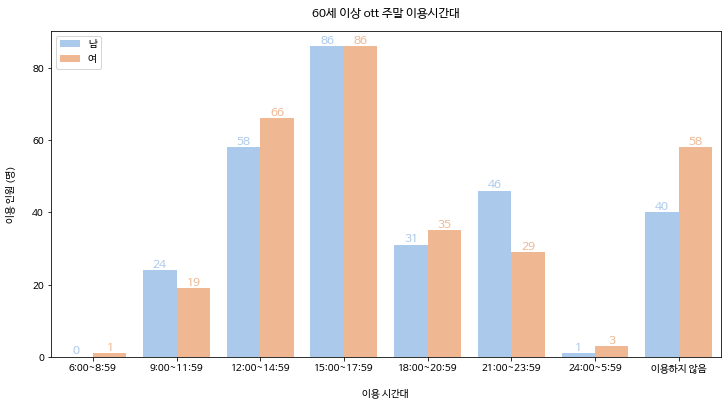

In [79]:
target_age = '60세 이상'

fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette('pastel')
sns.countplot(x='ott 주말 이용시간대', hue='성별', order=order, data=sns_test_df[sns_test_df['연령'] == target_age])
# plt.title('10대 ott 주중 이용시간대')
ax.set_xlabel('이용 시간대', labelpad=15)
ax.set_ylabel('이용 인원 (명)', labelpad=15)
ax.set_title(f'{target_age} ott 주말 이용시간대', pad=15)

# legend
ax.legend(loc='upper left')

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar.get_y() + bar_value
    else:
        text = 0
        text_y = 0

    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.

#         text_y = bar.get_y() + bar_value

    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

# Data for 2019 

In [80]:
# print(meta_2020.column_names_to_labels)
print(meta2_2019.column_names_to_labels)

{'PID': 'Panel ID', 'K_PID': '가구아이디', 'WGT2': '가중치', 'Q603': '가구주와의 관계', 'Q604': '성별', 'Q605': '생년(양력)', 'Q605R': '연령', 'Q606': '혼인상태', 'Q607': '학력', 'Q608': '이수여부', 'Q609': '직업(A는70)', 'city': '도시규모', 'Q610': '시부/군부', 'Q611': '조사구 번호', 'Q612': '거처 번호', 'Q613': '가구 번호', 'Q614': '거주지', 'Q615': '집의 유형', 'Q616': '기타', 'Q617': '문19.월 평균 가구 통신료', 'Q621': '가족구성', 'Q622': '월 평균 가구소득', 'Q623': '가구원 수', 'TQ': 'Temporary', 'TV': 'TV 소유', 'RD': '라디오 소유', 'CT': '컴퓨터/테블릿PC 소유', 'Q42A': '차량용 DMB 단말기 소유', 'Q43A': 'VCR/DVD플레이어/블루레이 플레이어 소유', 'Q46A': '디지털 카메라/캠코더 소유', 'Q48A': '가구 보유형 게임기 소유', 'Q49A': '스마트형 TV 수신 장치 소유', 'Q50A': '가정용 전화 회선 사용', 'TV_1': '지상파만 이용-리코딩', 'TV_2': '케이블 방송 이용-리코딩', 'TV_3': '위성방송 이용-리코딩', 'TV_4': 'IPTV 이용-리코딩', 'TV_5': '아날로그 케이블 이용-리코딩', 'TV_6': '디지털 케이블 이용-리코딩', 'Q31': '1-1 일반TV(대).보유 대수', 'Q32': '1-1 디지털TV(대).보유 대수', 'Q33': 'UHDTV.보유 대수', 'Q34': '스마트TV. 보유 대수', 'Q125': '빌트인 TV. 보유 대수', 'Q126': '컴퓨터/모니터겸용. TV 보유 대수', 'Q36': '1-2 라디오전용.수신기.(라디오) 보유 대수', 'Q37': '차량용 라디오. 보유 대수',

In [81]:
meta2_2019.column_names_to_labels

{'PID': 'Panel ID',
 'K_PID': '가구아이디',
 'WGT2': '가중치',
 'Q603': '가구주와의 관계',
 'Q604': '성별',
 'Q605': '생년(양력)',
 'Q605R': '연령',
 'Q606': '혼인상태',
 'Q607': '학력',
 'Q608': '이수여부',
 'Q609': '직업(A는70)',
 'city': '도시규모',
 'Q610': '시부/군부',
 'Q611': '조사구 번호',
 'Q612': '거처 번호',
 'Q613': '가구 번호',
 'Q614': '거주지',
 'Q615': '집의 유형',
 'Q616': '기타',
 'Q617': '문19.월 평균 가구 통신료',
 'Q621': '가족구성',
 'Q622': '월 평균 가구소득',
 'Q623': '가구원 수',
 'TQ': 'Temporary',
 'TV': 'TV 소유',
 'RD': '라디오 소유',
 'CT': '컴퓨터/테블릿PC 소유',
 'Q42A': '차량용 DMB 단말기 소유',
 'Q43A': 'VCR/DVD플레이어/블루레이 플레이어 소유',
 'Q46A': '디지털 카메라/캠코더 소유',
 'Q48A': '가구 보유형 게임기 소유',
 'Q49A': '스마트형 TV 수신 장치 소유',
 'Q50A': '가정용 전화 회선 사용',
 'TV_1': '지상파만 이용-리코딩',
 'TV_2': '케이블 방송 이용-리코딩',
 'TV_3': '위성방송 이용-리코딩',
 'TV_4': 'IPTV 이용-리코딩',
 'TV_5': '아날로그 케이블 이용-리코딩',
 'TV_6': '디지털 케이블 이용-리코딩',
 'Q31': '1-1 일반TV(대).보유 대수',
 'Q32': '1-1 디지털TV(대).보유 대수',
 'Q33': 'UHDTV.보유 대수',
 'Q34': '스마트TV. 보유 대수',
 'Q125': '빌트인 TV. 보유 대수',
 'Q126': '컴퓨터/모니터겸용. TV 보유 대수',
 'Q36': '1-2 라디오

In [82]:
raw_personal_2019_df.shape

(6375, 3245)

In [83]:
raw_personal_2019_df.head(1)

,PID,K_PID,WGT2,Q603,Q604,Q605,Q605R,Q606,Q607,Q608,...,BQ481A72_3,BQ481A72_4,BQ481A72_5,BQ481A72_6,BQ481A72_7,BQ481A72_8,BQ481A72_9,BQ481A72_10,BQ481A72_11,BQ481A72_12
0,101.0,1.0,3.978329,가구주,남,1996.0,22.0,미혼,대학교(4년제 이상),재학,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
raw_personal_2019_df[['dm4']]

,dm4
0,학생
1,학생
2,서비스/판매직
3,주부
4,서비스/판매직
...,...
6370,학생
6371,주부
6372,학생
6373,서비스/판매직


In [85]:
raw_personal_2019_df['PID'] = raw_personal_2019_df['PID'].astype(int)
raw_personal_2019_df['Q605R'] = raw_personal_2019_df['Q605R'].astype(int)

- '온라인' 이라는 단어가 들어간 value를 가진 dict

In [86]:
p_labels_2019 = meta2_2019.column_names_to_labels

In [87]:
dict_contains_online_2019 = dict()
for k in p_labels_2019:
    if '온라인' in p_labels_2019[k]:
        dict_contains_online_2019[k] = p_labels_2019[k]

In [88]:
print(len(dict_contains_online_2019))
dict_contains_online_2019

69


{'Q520M_1': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_2': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_3': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_4': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_5': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_6': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_7': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_8': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_9': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_10': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_11': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_12': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_13': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_14': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_15': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_16': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_17': '문11.이용한 온라인 동영상 제공 서비스',
 'Q520M_18': '문11.이용한 온라인 동영상 제공 서비스',
 'Q521': '문11 기타.이용한 온라인동영상제공서비스',
 'Q551M_1': '문12.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_2': '문12.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_3': '문12.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_4': '문12.온라인동영상제공서비스 유료서비스 이용',
 'Q551M_5': '문12.온라인동영상제공서비스 유료서비스 이용',
 'Q552': '문13-1(주중).온라인동영상제공서비스 주 이용시간대',
 'Q553': '문13-2(주말).온라인동영상제공서비

### ott 시청시간대 2019

In [89]:
# 온라인동영상제공서비스 주 이용시간대
print(raw_personal_2019_df.columns.get_loc("Q552")) # 주중 이용시간
print(raw_personal_2019_df.columns.get_loc("Q553")) # 주말 이용시간

220
221


'Q604': '성별', 'Q605': '생년(양력)', 'Q605R': '연령', 'Q606':

In [90]:
print(raw_personal_2019_df.columns.get_loc("Q604")) # 성별
print(raw_personal_2019_df.columns.get_loc("Q605R")) # 연령

4
6


In [91]:
raw_personal_2019_df['dm4'].unique()

['학생', '서비스/판매직', '주부', '사무직', '무직', '생산직', '기타']
Categories (7, object): ['기타', '무직', '사무직', '생산직', '서비스/판매직', '주부', '학생']

In [92]:
time_use_ott_2019_df = pd.DataFrame(raw_personal_2019_df[['PID','Q604', 'Q605R', 'dm4', 'Q552', 'Q553']])
time_use_ott_2019_df.head()

,PID,Q604,Q605R,dm4,Q552,Q553
0,101,남,22,학생,21:00~23:59,18:00~20:59
1,201,남,23,학생,NaN,NaN
2,301,남,64,서비스/판매직,18:00~20:59,15:00~17:59
3,401,여,60,주부,NaN,NaN
4,501,여,62,서비스/판매직,NaN,NaN


###### exclude rows contains NaN in Q552 and Q553

In [93]:
time_use_ott_2019_nn_df = time_use_ott_2019_df[(time_use_ott_2019_df['Q552'].notna() == True) & (time_use_ott_2019_df['Q553'].notna() == True)]
# shape of time_usse_ott_2019_nn_df does not change if replace & to |
time_use_ott_2019_nn_df = time_use_ott_2019_nn_df.sort_values(by='Q604')
time_use_ott_2019_nn_df.head()

,PID,Q604,Q605R,dm4,Q552,Q553
0,101,남,22,학생,21:00~23:59,18:00~20:59
2742,171201,남,63,서비스/판매직,21:00~23:59,이용하지 않음
2735,170701,남,62,사무직,21:00~23:59,15:00~17:59
2718,169202,남,48,생산직,12:00~14:59,12:00~14:59
2713,168903,남,8,학생,21:00~23:59,21:00~23:59


In [94]:
time_use_ott_2019_nn_df = time_use_ott_2019_nn_df.rename(columns={'Q604':'성별', 'Q605R':'연령','Q552':'ott 주중 이용시간대', 'Q553':'ott 주말 이용시간대', 'dm4':'직업'})
time_use_ott_2019_nn_df.head()

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
0,101,남,22,학생,21:00~23:59,18:00~20:59
2742,171201,남,63,서비스/판매직,21:00~23:59,이용하지 않음
2735,170701,남,62,사무직,21:00~23:59,15:00~17:59
2718,169202,남,48,생산직,12:00~14:59,12:00~14:59
2713,168903,남,8,학생,21:00~23:59,21:00~23:59


In [95]:
print(time_use_ott_2019_nn_df['ott 주중 이용시간대'].unique())
print(time_use_ott_2019_nn_df['ott 주중 이용시간대'].count()) 
time_use_ott_2019_nn_df['ott 주중 이용시간대'].value_counts()

['21:00~23:59', '12:00~14:59', '18:00~20:59', '15:00~17:59', '이용하지 않음', '6:00~8:59', '9:00~11:59', '24:00~5:59']
Categories (8, object): ['12:00~14:59', '15:00~17:59', '18:00~20:59', '21:00~23:59', '24:00~5:59', '6:00~8:59', '9:00~11:59', '이용하지 않음']
2264


21:00~23:59    608
12:00~14:59    506
18:00~20:59    427
15:00~17:59    386
이용하지 않음        183
9:00~11:59      82
24:00~5:59      52
6:00~8:59       20
Name: ott 주중 이용시간대, dtype: int64

In [96]:
time_use_ott_2019_nn_df['ott 주말 이용시간대'].value_counts()

21:00~23:59    503
15:00~17:59    452
12:00~14:59    410
18:00~20:59    377
이용하지 않음        369
9:00~11:59      92
24:00~5:59      55
6:00~8:59        6
Name: ott 주말 이용시간대, dtype: int64

#####  Age categorizing

In [97]:
print(time_use_ott_2019_nn_df['연령'].min(), time_use_ott_2019_nn_df['연령'].max())

8 88


In [98]:
time_use_ott_2019_nn_df[time_use_ott_2019_nn_df['연령'] < 10]

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
2713,168903,남,8,학생,21:00~23:59,21:00~23:59


- There is only one row which has age under 10.

  Decided to drop this row, PID = 168903

In [99]:
time_use_ott_2019_nn_df = time_use_ott_2019_nn_df.drop(2713)

In [100]:
time_use_ott_2019_nn_df[time_use_ott_2019_nn_df['연령'] < 10]
print('before: 2264, after:',time_use_ott_2019_nn_df['ott 주중 이용시간대'].count()) 
# targer deleted

before: 2264, after: 2263


In [101]:
# how many rows of age equal or greater than 60
time_use_ott_2019_nn_df[time_use_ott_2019_nn_df['연령'] >= 60]['PID'].count()
# it is quite reasonable to bind equal or over 60 as one category

322

In [102]:
bins = [10, 20, 30, 40, 50, 120]
labels = ['10대', '20대', '30대', '40대', '50세 이상']
time_use_ott_2019_nn_df['연령'] = pd.cut(time_use_ott_2019_nn_df['연령'], bins=bins, labels=labels, right=False)

In [103]:
time_use_ott_2019_nn_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
0,101,남,20대,학생,21:00~23:59,18:00~20:59
2742,171201,남,50세 이상,서비스/판매직,21:00~23:59,이용하지 않음
2735,170701,남,50세 이상,사무직,21:00~23:59,15:00~17:59
2718,169202,남,40대,생산직,12:00~14:59,12:00~14:59
2708,168702,남,40대,생산직,18:00~20:59,15:00~17:59
...,...,...,...,...,...,...
2932,182302,여,30대,사무직,12:00~14:59,21:00~23:59
2930,182202,여,30대,주부,12:00~14:59,12:00~14:59
2923,181801,여,30대,사무직,21:00~23:59,21:00~23:59
2960,184001,여,20대,사무직,18:00~20:59,18:00~20:59


In [104]:
time_use_ott_2019_nn_df[['PID', '성별']]

,PID,성별
0,101,남
2742,171201,남
2735,170701,남
2718,169202,남
2708,168702,남
...,...,...
2932,182302,여
2930,182202,여
2923,181801,여
2960,184001,여


In [105]:
sorted(set(time_use_ott_2019_nn_df['ott 주중 이용시간대']))

['12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '6:00~8:59',
 '9:00~11:59',
 '이용하지 않음']

In [106]:
order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

Text(0.5, 1.0, '남녀별 ott 주중 이용시간대 2019')

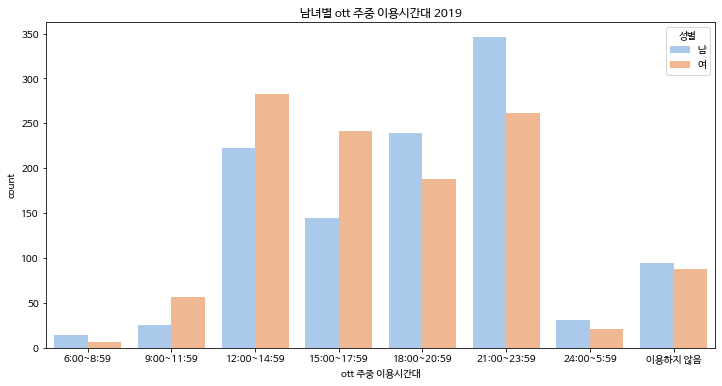

In [107]:
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.countplot(x='ott 주중 이용시간대', hue='성별', order=order, data=time_use_ott_2019_nn_df)
plt.title('남녀별 ott 주중 이용시간대 2019')

Text(0.5, 1.0, '남녀별 ott 주말 이용시간대 2019')

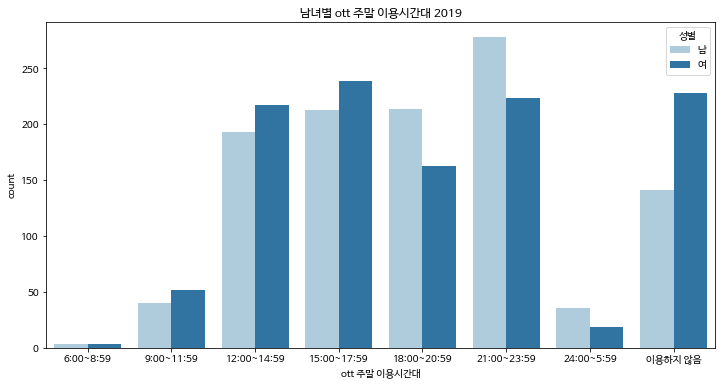

In [108]:
plt.figure(figsize=(12,6))
sns.set_palette('Paired')
sns.countplot(x='ott 주말 이용시간대', hue='성별', order=order, data=time_use_ott_2019_nn_df)
plt.title('남녀별 ott 주말 이용시간대 2019')

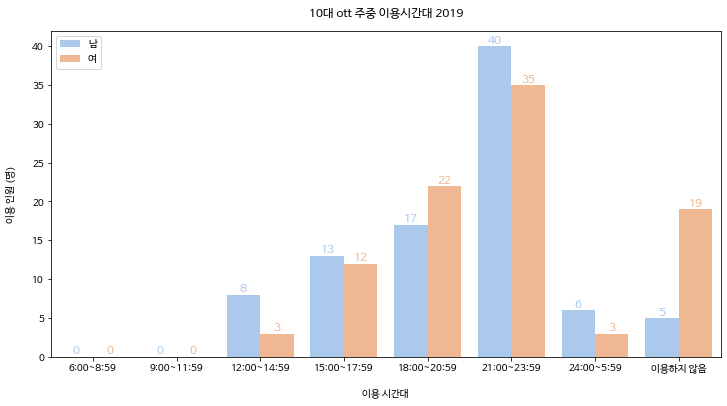

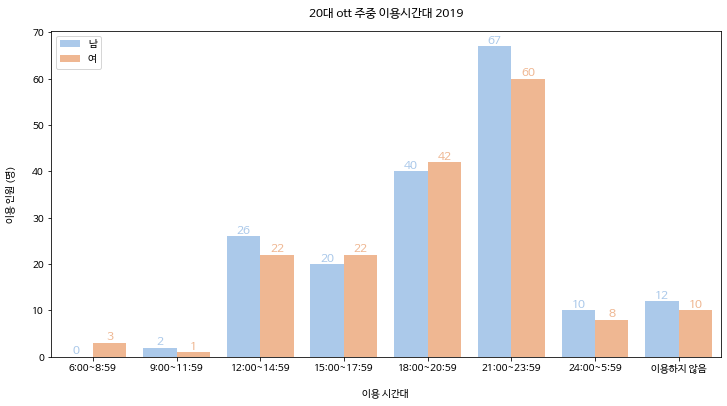

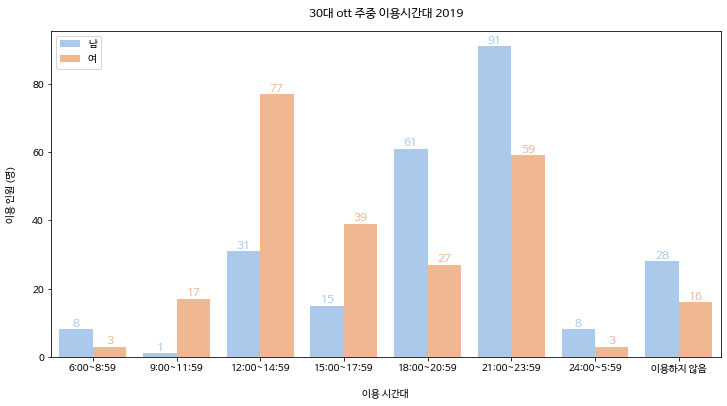

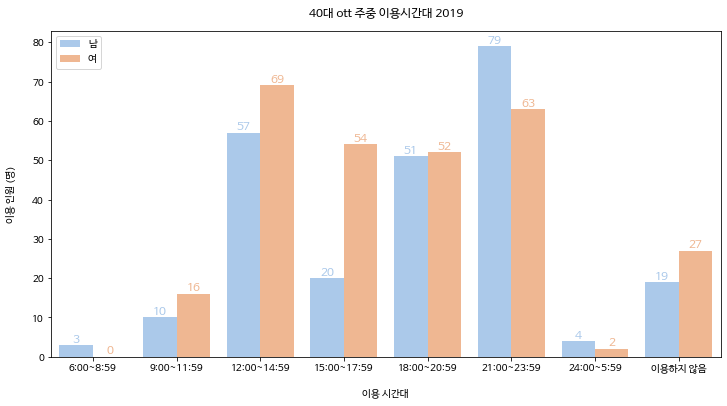

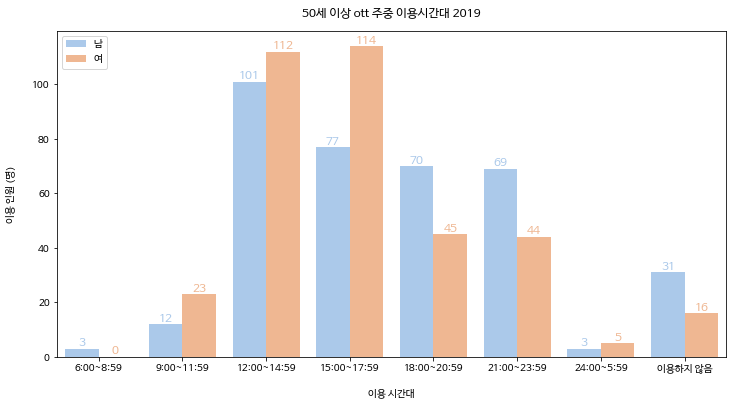

In [109]:
target_age_list = ['10대', '20대', '30대', '40대', '50세 이상']

for target_age in target_age_list:

    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_palette('pastel')
    sns.countplot(x='ott 주중 이용시간대', hue='성별', order=order, data=time_use_ott_2019_nn_df[time_use_ott_2019_nn_df['연령'] == target_age])
    # plt.title('10대 ott 주중 이용시간대')
    ax.set_xlabel('이용 시간대', labelpad=15)
    ax.set_ylabel('이용 인원 (명)', labelpad=15)
    ax.set_title(f'{target_age} ott 주중 이용시간대 2019', pad=15)

    # legend
    ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{int(bar_value):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0
            
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        
#         text_y = bar.get_y() + bar_value
        
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

In [110]:
order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

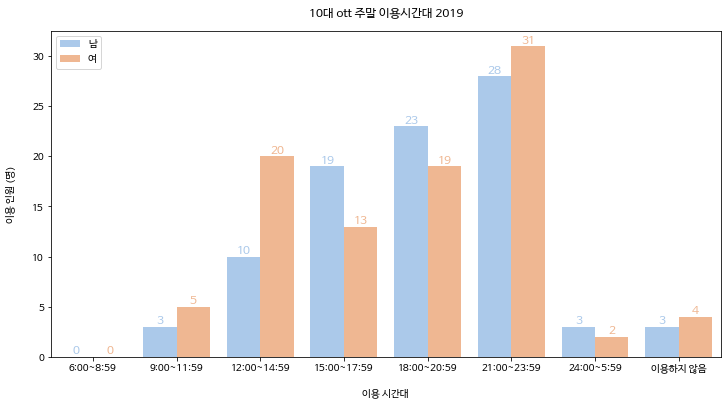

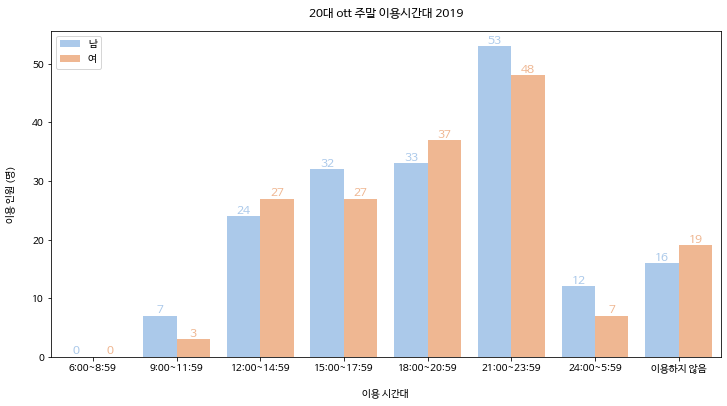

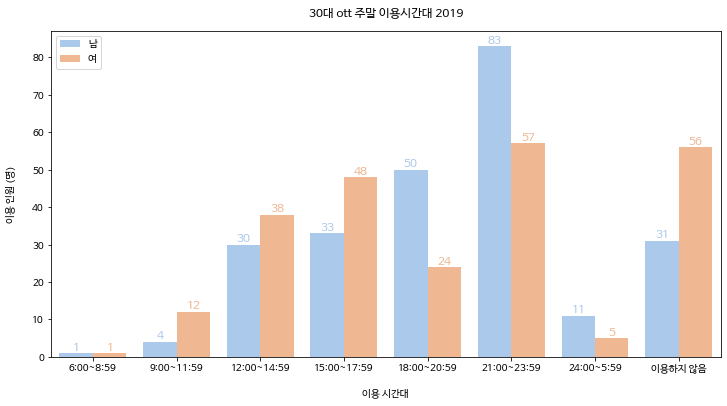

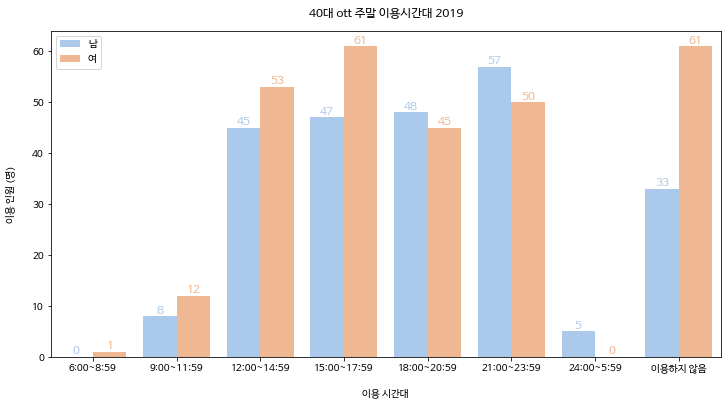

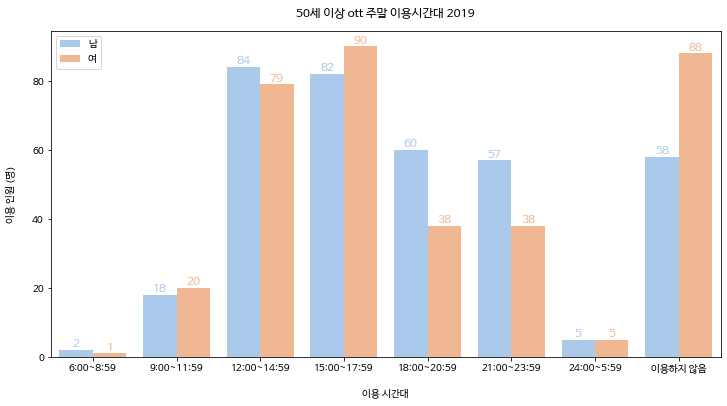

In [111]:

target_age_list = ['10대', '20대', '30대', '40대', '50세 이상']

for target_age in target_age_list:

    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_palette('pastel')
    sns.countplot(x='ott 주말 이용시간대', hue='성별', order=order, data=time_use_ott_2019_nn_df[time_use_ott_2019_nn_df['연령'] == target_age])
    # plt.title('10대 ott 주중 이용시간대')
    ax.set_xlabel('이용 시간대', labelpad=15)
    ax.set_ylabel('이용 인원 (명)', labelpad=15)
    ax.set_title(f'{target_age} ott 주말 이용시간대 2019', pad=15)

    # legend
    ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{int(bar_value):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0
            
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        
#         text_y = bar.get_y() + bar_value
        
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

# Merge data 2019 and 2020 

In [112]:
# data for 2019
time_use_ott_2019_nn_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
0,101,남,20대,학생,21:00~23:59,18:00~20:59
2742,171201,남,50세 이상,서비스/판매직,21:00~23:59,이용하지 않음
2735,170701,남,50세 이상,사무직,21:00~23:59,15:00~17:59
2718,169202,남,40대,생산직,12:00~14:59,12:00~14:59
2708,168702,남,40대,생산직,18:00~20:59,15:00~17:59
...,...,...,...,...,...,...
2932,182302,여,30대,사무직,12:00~14:59,21:00~23:59
2930,182202,여,30대,주부,12:00~14:59,12:00~14:59
2923,181801,여,30대,사무직,21:00~23:59,21:00~23:59
2960,184001,여,20대,사무직,18:00~20:59,18:00~20:59


In [113]:
to_merge_2019_df = time_use_ott_2019_nn_df.copy()
to_merge_2019_df['연도'] = 2019
to_merge_2019_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,101,남,20대,학생,21:00~23:59,18:00~20:59,2019
2742,171201,남,50세 이상,서비스/판매직,21:00~23:59,이용하지 않음,2019
2735,170701,남,50세 이상,사무직,21:00~23:59,15:00~17:59,2019
2718,169202,남,40대,생산직,12:00~14:59,12:00~14:59,2019
2708,168702,남,40대,생산직,18:00~20:59,15:00~17:59,2019
...,...,...,...,...,...,...,...
2932,182302,여,30대,사무직,12:00~14:59,21:00~23:59,2019
2930,182202,여,30대,주부,12:00~14:59,12:00~14:59,2019
2923,181801,여,30대,사무직,21:00~23:59,21:00~23:59,2019
2960,184001,여,20대,사무직,18:00~20:59,18:00~20:59,2019


In [114]:
# data for 2020 
sns_test_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
2095,138402,남,60세 이상,사무직,18:00~20:59,12:00~14:59
2108,139404,남,20대,무직,18:00~20:59,18:00~20:59
4409,292503,남,10대,학생,12:00~14:59,9:00~11:59
2106,139402,남,60세 이상,서비스/판매직,18:00~20:59,18:00~20:59
3535,232901,남,30대,무직,21:00~23:59,21:00~23:59
...,...,...,...,...,...,...
2733,183002,여,40대,사무직,18:00~20:59,이용하지 않음
2730,182801,여,40대,서비스/판매직,21:00~23:59,이용하지 않음
2729,182701,여,40대,서비스/판매직,18:00~20:59,이용하지 않음
2723,182202,여,30대,서비스/판매직,21:00~23:59,21:00~23:59


In [115]:
to_merge_2020_df = sns_test_df.copy()
to_merge_2020_df['연도'] = 2020
to_merge_2020_df

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
2095,138402,남,60세 이상,사무직,18:00~20:59,12:00~14:59,2020
2108,139404,남,20대,무직,18:00~20:59,18:00~20:59,2020
4409,292503,남,10대,학생,12:00~14:59,9:00~11:59,2020
2106,139402,남,60세 이상,서비스/판매직,18:00~20:59,18:00~20:59,2020
3535,232901,남,30대,무직,21:00~23:59,21:00~23:59,2020
...,...,...,...,...,...,...,...
2733,183002,여,40대,사무직,18:00~20:59,이용하지 않음,2020
2730,182801,여,40대,서비스/판매직,21:00~23:59,이용하지 않음,2020
2729,182701,여,40대,서비스/판매직,18:00~20:59,이용하지 않음,2020
2723,182202,여,30대,서비스/판매직,21:00~23:59,21:00~23:59,2020


In [116]:
merged_df = pd.concat([to_merge_2019_df, to_merge_2020_df], axis=0)

In [117]:
merged_df.sort_values(by='성별')

,PID,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,101,남,20대,학생,21:00~23:59,18:00~20:59,2019
4613,307001,남,60세 이상,무직,18:00~20:59,18:00~20:59,2020
2984,198703,남,10대,학생,21:00~23:59,21:00~23:59,2020
2983,198702,남,50대,서비스/판매직,21:00~23:59,21:00~23:59,2020
4615,307101,남,40대,사무직,15:00~17:59,15:00~17:59,2020
...,...,...,...,...,...,...,...
5260,329801,여,50세 이상,주부,18:00~20:59,21:00~23:59,2019
5254,329201,여,40대,서비스/판매직,15:00~17:59,15:00~17:59,2019
5249,328901,여,30대,서비스/판매직,18:00~20:59,24:00~5:59,2019
5982,372902,여,40대,주부,21:00~23:59,21:00~23:59,2019


In [118]:
merged_df = merged_df.drop('PID', axis=1)

In [119]:
merged_df

,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,남,20대,학생,21:00~23:59,18:00~20:59,2019
2742,남,50세 이상,서비스/판매직,21:00~23:59,이용하지 않음,2019
2735,남,50세 이상,사무직,21:00~23:59,15:00~17:59,2019
2718,남,40대,생산직,12:00~14:59,12:00~14:59,2019
2708,남,40대,생산직,18:00~20:59,15:00~17:59,2019
...,...,...,...,...,...,...
2733,여,40대,사무직,18:00~20:59,이용하지 않음,2020
2730,여,40대,서비스/판매직,21:00~23:59,이용하지 않음,2020
2729,여,40대,서비스/판매직,18:00~20:59,이용하지 않음,2020
2723,여,30대,서비스/판매직,21:00~23:59,21:00~23:59,2020


- create a csv

In [120]:
# merged_df.to_csv('../data/ott_2019_2020_modified.csv', sep=',', encoding='utf-8-sig')

In [121]:
# merged_df = pd.read_csv('../data/ott_2019_2020.csv')

In [122]:
merged_df.dtypes

성별              object
연령              object
직업              object
ott 주중 이용시간대    object
ott 주말 이용시간대    object
연도               int64
dtype: object

##  Plotting with merged_df

In [123]:
merged_df[merged_df['성별'] == '남']


,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대,연도
0,남,20대,학생,21:00~23:59,18:00~20:59,2019
2742,남,50세 이상,서비스/판매직,21:00~23:59,이용하지 않음,2019
2735,남,50세 이상,사무직,21:00~23:59,15:00~17:59,2019
2718,남,40대,생산직,12:00~14:59,12:00~14:59,2019
2708,남,40대,생산직,18:00~20:59,15:00~17:59,2019
...,...,...,...,...,...,...
5575,남,30대,사무직,15:00~17:59,이용하지 않음,2020
1191,남,30대,생산직,21:00~23:59,15:00~17:59,2020
4293,남,30대,사무직,21:00~23:59,9:00~11:59,2020
71,남,20대,사무직,21:00~23:59,21:00~23:59,2020


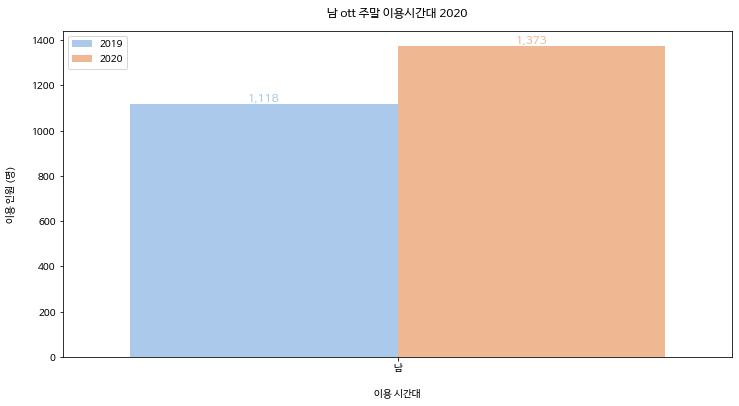

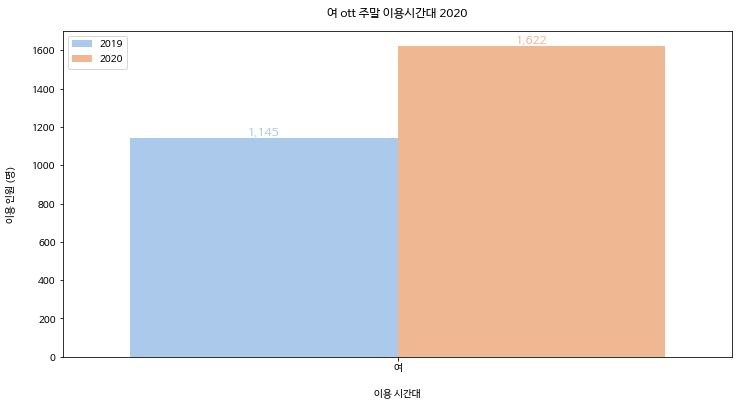

In [124]:
target_gender_list = ['남', '여']

for target_gender in target_gender_list:

    fig, ax = plt.subplots(figsize=(12,6))
    sns.set_palette('pastel')
    sns.countplot(x='성별', hue='연도', data=merged_df[merged_df['성별'] == target_gender])
    # plt.title('10대 ott 주중 이용시간대')
    ax.set_xlabel('이용 시간대', labelpad=15)
    ax.set_ylabel('이용 인원 (명)', labelpad=15)
    ax.set_title(f'{target_gender} ott 주말 이용시간대 2020', pad=15)

    # legend
    ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{int(bar_value):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0
            
        # This will give the middle of each bar on the x-axis.
        text_x = bar.get_x() + bar.get_width() / 2
        # get_y() is where the bar starts so we add the height to it.
        
        # text_y = bar.get_y() + bar_value
        
        # If we want the text to be the same color as the bar, we can
        # get the color like so:
        bar_color = bar.get_facecolor()
        # If you want a consistent color, you can just set it as a constant, e.g. #222222
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

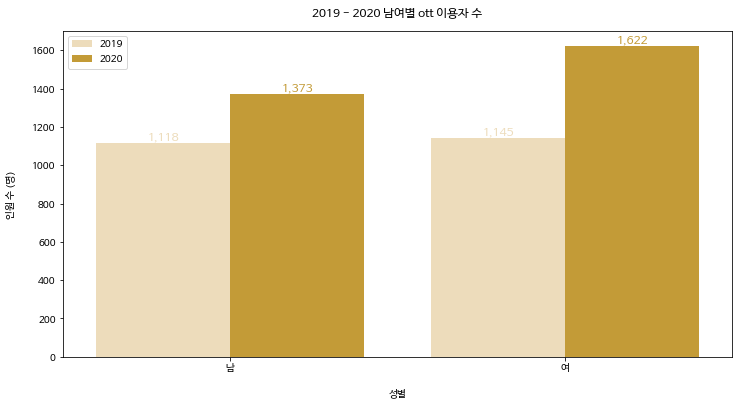

In [125]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette("hls", n_colors=4)
sns.countplot(x='성별', hue='연도', data=merged_df, palette=['wheat', 'goldenrod'])
# plt.title('10대 ott 주중 이용시간대')
ax.set_xlabel('성별', labelpad=15)
ax.set_ylabel('인원 수 (명)', labelpad=15)
ax.set_title(f'2019 - 2020 남여별 ott 이용자 수', pad=15)

# legend
ax.legend(loc='upper left')

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar.get_y() + bar_value
    else:
        text = 0
        text_y = 0

    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.

#         text_y = bar.get_y() + bar_value

    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

#### Pie Chart According to Gender

In [126]:
num_2019 = merged_df[merged_df['연도'] == 2019 ]['성별'].count()
print(num_2019)
num_2020 = merged_df[merged_df['연도'] == 2020 ]['성별'].count()
print(num_2020)
print('sum: ', num_2019 + num_2020)

2263
2995
sum:  5258


In [127]:
num_male_2019 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2019)]['성별'].count()
print(num_male_2019)
num_female_2019 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2019)]['성별'].count()
print(num_female_2019)
num_male_2020 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2020)]['성별'].count()
print(num_male_2020)
num_female_2020 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2020)]['성별'].count()
print(num_female_2020)
print('sum: ', num_female_2019+num_female_2020+num_male_2019+num_male_2020)

1118
1145
1373
1622
sum:  5258


In [128]:
num_male_pct_2019 = round((num_male_2019/(num_male_2019+num_female_2019))*100,1)
print(num_male_pct_2019)
num_female_pct_2019 = round((num_female_2019/(num_male_2019+num_female_2019))*100,1)
print(num_female_pct_2019)
num_male_pct_2020 = round((num_male_2020/(num_male_2020+num_female_2020))*100,1)
print(num_male_pct_2020)
num_female_pct_2020 = round((num_female_2020/(num_male_2020+num_female_2020))*100,1)
print(num_female_pct_2020)

49.4
50.6
45.8
54.2


###### references

- dual pie : https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

- dual pie legends : https://stackoverflow.com/questions/55267993/add-legends-to-nested-pie-charts

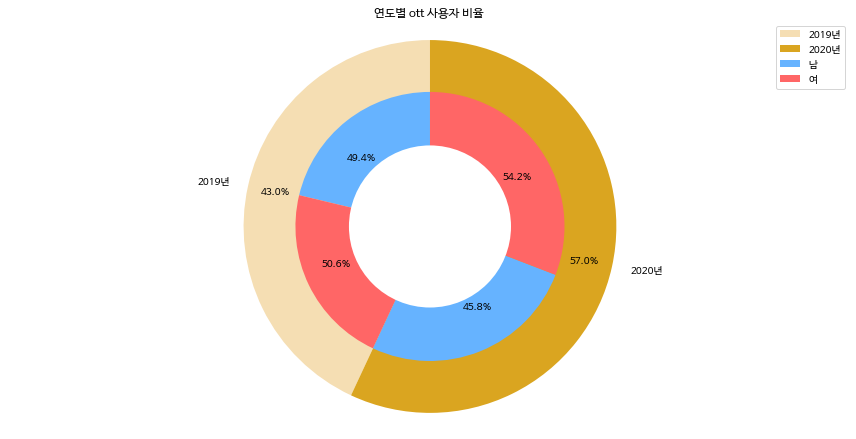

In [129]:
num_male_2019 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2019)]['성별'].count()
num_female_2019 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2019)]['성별'].count()
num_male_2020 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2020)]['성별'].count()
num_female_2020 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2020)]['성별'].count()

num_male_pct_2019 = round((num_male_2019/(num_male_2019+num_female_2019))*100,1)
num_female_pct_2019 = round((num_female_2019/(num_male_2019+num_female_2019))*100,1)
num_male_pct_2020 = round((num_male_2020/(num_male_2020+num_female_2020))*100,1)
num_female_pct_2020 = round((num_female_2020/(num_male_2020+num_female_2020))*100,1)


fig, ax = plt.subplots(figsize=(12,6))


    # Pie chart
labels = ['2019년', '2020년']
sizes = [num_2019, num_2020]
    #colors
colors = ['wheat', 'goldenrod']
#explsion
# explode = (0.05, 0.05)

sizes_gender = [num_male_2019, num_female_2019, num_male_2020, num_female_2020]
labels_gender = [f'{num_male_pct_2019}%', f'{num_female_pct_2019}%', f'{num_male_pct_2020}%', f'{num_female_pct_2020}%']
colors_gender = ['#66b3ff', '#ff6666', '#66b3ff', '#ff6666']
 
pie1 = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', radius=1.15, startangle=90, pctdistance=0.85)
# plt.pie(sizes_gender, colors=colors_gender, autopct='%1.1f%%', radius=0.83, startangle=90, pctdistance=0.75)
pie2 = plt.pie(sizes_gender, colors=colors_gender, labels=labels_gender, radius=0.83, startangle=90, labeldistance=0.65)




#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
centre_circle.set_alpha(1.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('연도별 ott 사용자 비율')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:], ['2019년', '2020년', '남', '여'])


# plt.savefig("../data/ppt_png/Rate of OTT Users by Years and Genders", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()